In [31]:
import pandas as pd
data=pd.read_csv("titanic-passengers.csv", sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S


In [32]:
def preprocess_data(NewData):
    NewData["Age"].fillna(NewData["Age"].mean(), inplace=True)
    NewData.replace({"Sex":{"male":0, "female":1}}, inplace=True)
    NewData["Cabin"]=NewData.Cabin.fillna("G6")
    NewData.replace({"Survived":{"No":0,"Yes":1}}, inplace=True)
    return NewData
df= preprocess_data(data)

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,G6,S


In [34]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
x=df.drop(["Survived","Name","Cabin","Ticket","Embarked"], axis=1)
y=df["Survived"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=10)

Treee = DecisionTreeClassifier()
Treee= Treee.fit(x_train, y_train)
y_pred = Treee.predict(x_test)
print("Score: {}".format(accuracy_score(y_test, y_pred))) # Model Accuracy, how often is the classifier correct?

Score: 0.7821229050279329


In [36]:
import graphviz

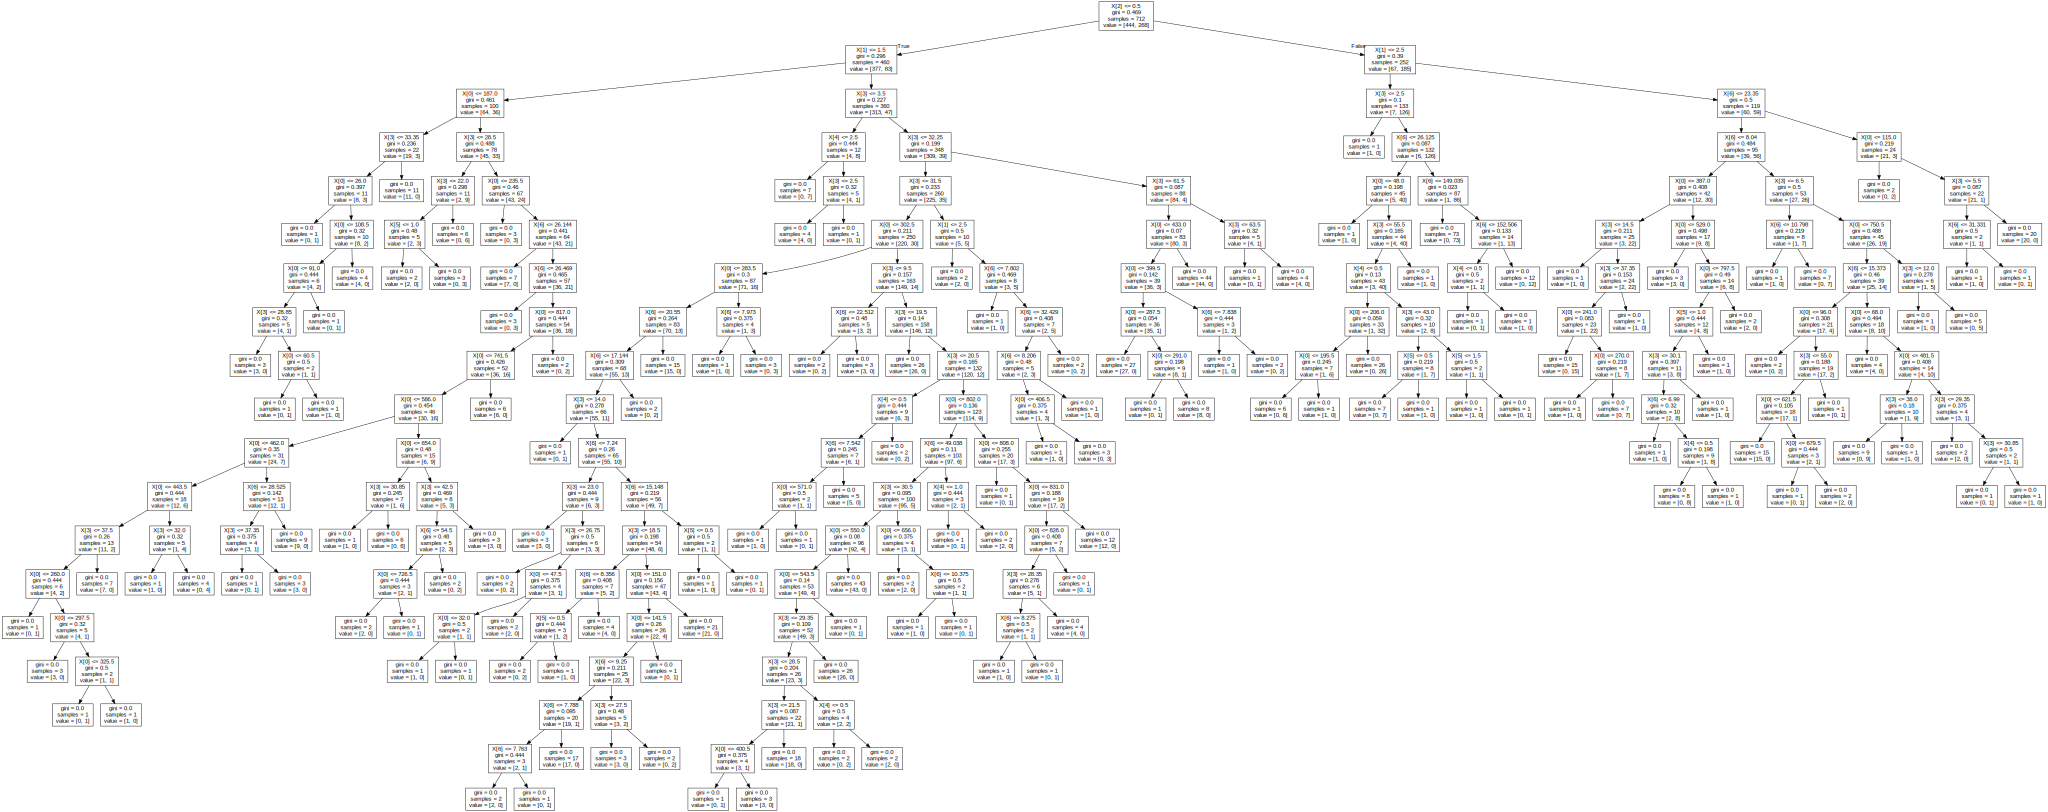

In [37]:
dot_data = tree.export_graphviz(Treee, out_file=None)
graph= graphviz.Source(dot_data)
graph.render("df")
graph

# Conclusion
#### I actually can't conclude because i can't seem to understand the content and i can't it globally 

# 3. Change the decision tree parameters(at least two parameters). 

In [60]:
dtree= tree.DecisionTreeClassifier(criterion="gini", splitter="random",max_leaf_nodes=15, min_samples_leaf=10, max_depth=6)

# 4. Calculate the new accuracy and compare it with the previous results.

In [61]:
dtree= dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print("Score: {}".format(accuracy_score(y_test, y_pred)))

Score: 0.7877094972067039


##### les valeurs des parametres de l'arbre de decision sont proportionnels a la valeur de la precision, plus ils sont elevé plus c'est precis.

# 5. Use a random forest then change the number of estimators.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [52]:
X=data[["Pclass", "Age", "Sex"]]
Y=data["Survived"]

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3)

RFC= RandomForestClassifier(n_estimators=100)
RFC.fit(X_train, Y_train)
Y_Pred=RFC.predict(X_test)

# 6. Calculate the new accuracy and compare it with the previous result.

In [53]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_Pred))

Accuracy: 0.8097014925373134


##### La random forest est encore plus precise que l'arbre de decision, elle reduit la variance dans les arbres de decision et utilise beaucoup plus d'echantillons pour l'entrainement